###### Task 10: You need to classify the reviews from the IMDB dataset into positive and negative reviews
###### Dataset:IMDB 
###### Layers: 1 LSTM, 1 Dense 
###### No of units: 32, 1 
###### Activation Function: tanh in the first layer and tanh in the final layer 
###### Optimizer: rmsprop Learning rate:0.00001

###### Raj Desai_20030242054

In [1]:
# Importing the libraries required
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from tensorflow.keras.optimizers import RMSprop

In [2]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [3]:
# Loading the IMDB dataset
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


###### Building LSTM model

In [5]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2,activation='tanh'))
model.add(Dense(1, activation='tanh'))

Build model...


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,580,641
Trainable params: 2,580,641
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Fitting and validating the model that we created with the learning rate of  0.00001
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr = 0.00001),
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Epoch 1/20
782/782 [==============================] - 126s 151ms/step - loss: 4.0358 - accuracy: 0.5019 - val_loss: 1.5304 - val_accuracy: 0.5000
Epoch 2/20
782/782 [==============================] - 113s 145ms/step - loss: 1.3287 - accuracy: 0.4992 - val_loss: 0.8401 - val_accuracy: 0.5000
Epoch 3/20
782/782 [==============================] - 117s 150ms/step - loss: 0.7672 - accuracy: 0.5065 - val_loss: 0.6761 - val_accuracy: 0.5960
Epoch 4/20
782/782 [==============================] - 121s 155ms/step - loss: 0.6734 - accuracy: 0.5930 - val_loss: 0.6619 - val_accuracy: 0.6399
Epoch 5/20
782/782 [==============================] - 111s 142ms/step - loss: 0.6577 - accuracy: 0.6434 - val_loss: 0.6451 - val_accuracy: 0.6813
Epoch 6/20
782/782 [==============================] - 110s 141ms/step - loss: 0.6407 - accuracy: 0.6740 - val_loss: 0.6238 - val_accuracy: 0.7038
Epoch 7/20
782/782 [==============================] - 111s 142ms/step - loss: 0.6148 - accuracy: 0.7074 - val_loss:

###### Visualizing the Training-Testing-Validation accuracy and loss during the training the model

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def display_models_plots(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'r', label='Training acc')
    plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

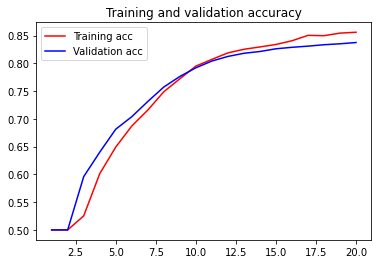

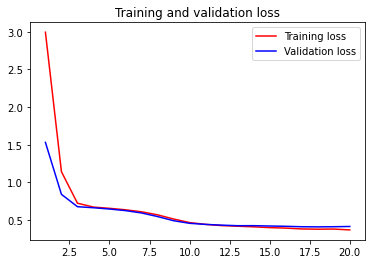

In [13]:
# Plotting the results
display_models_plots(history)

###### Inferrance:

> Here, in the first graph we can see that the training and validation accuracy is consistantly 
   increasing after each and every epochs in the begining but after the 10 the epoch the accuracy
   became constant and was fluctuating at very minor scale. Thus giving an overall accuracy 
   of 84% on the testing dataset. Moreover, we can clearly see here that there is no case of model
   overfitting
   
> In the second plot we can see that the training and validation loss has been falling constantly
   and just the dame as the accuracy the amount of loass also becomes constant after the 10th 
   epoch. This shows that the quality of LSTM model developed here using this parameters
   shows an effective application on both, the training and testing datasets.